# **Modelos supervisados**

## **Modelos de Regresión lineal**

La regresión lineal es un método estadístico utilizado para modelar la relación entre una variable dependiente (respuesta) y una o más variables independientes (predictoras).

### **Tipos de regresión lineal**
Regresión lineal simple: Solo una variable independiente.
Ejemplo: predecir el peso según la altura.

Regresión lineal múltiple: Dos o más variables independientes.
Ejemplo: predecir el precio de una casa usando tamaño, número de habitaciones, ubicación, etc.


#### **1. Regresión lineal simple**

Esta es la forma más simple de regresión lineal y solo implica una variable independiente y una variable dependiente. La ecuación de la regresión lineal simple es:

$$
y = \beta_{0} + \beta_{1}X \\
$$

Donde:

- Y es la variable dependiente
- X es la variable independiente
- β0 es la intersección, es decir, el punto donde la línea de regresión interseca el eje y.
- β1 es la pendiente, que controla la inclinación de la línea. Si elegimos dos puntos cualesquiera en una línea, la pendiente es el cociente entre la distancia vertical y la horizontal entre esos puntos; esto se suele escribir como elevación/recorrido.
El siguiente gráfico muestra una línea con la ecuación y = 2x + 12:

#### **2. Regresión lineal múltiple**

Esto implica más de una variable independiente y una variable dependiente. La ecuación de la regresión lineal múltiple es:

$$
y = \beta_{0}+\beta_{1}X1+\beta_{2}X2+.........\beta_{n}Xp \\
$$

Donde:

- Y es la variable dependiente
- X1, X2, …, Xp son las variables independientes
- β0 es la intersección
- β1, β2, …, βn son las pendientes

El objetivo del algoritmo es encontrar la ecuación de la recta de ajuste óptima que prediga los valores basándose en las variables independientes.

In [2]:
# 1. Importar las bibliotecas necesarias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### **Conjunto de datos: California Housing Dataset**
Nombre en scikit-learn: fetch_california_housing()

Descripción: Predice el precio medio de casas en distritos de California usando variables como ingreso medio, número de habitaciones, etc.

In [3]:
# 2. Cargar datos
data = fetch_california_housing(as_frame=True)
df = data.frame  # DataFrame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# 3. Inspeccionar los datos
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.

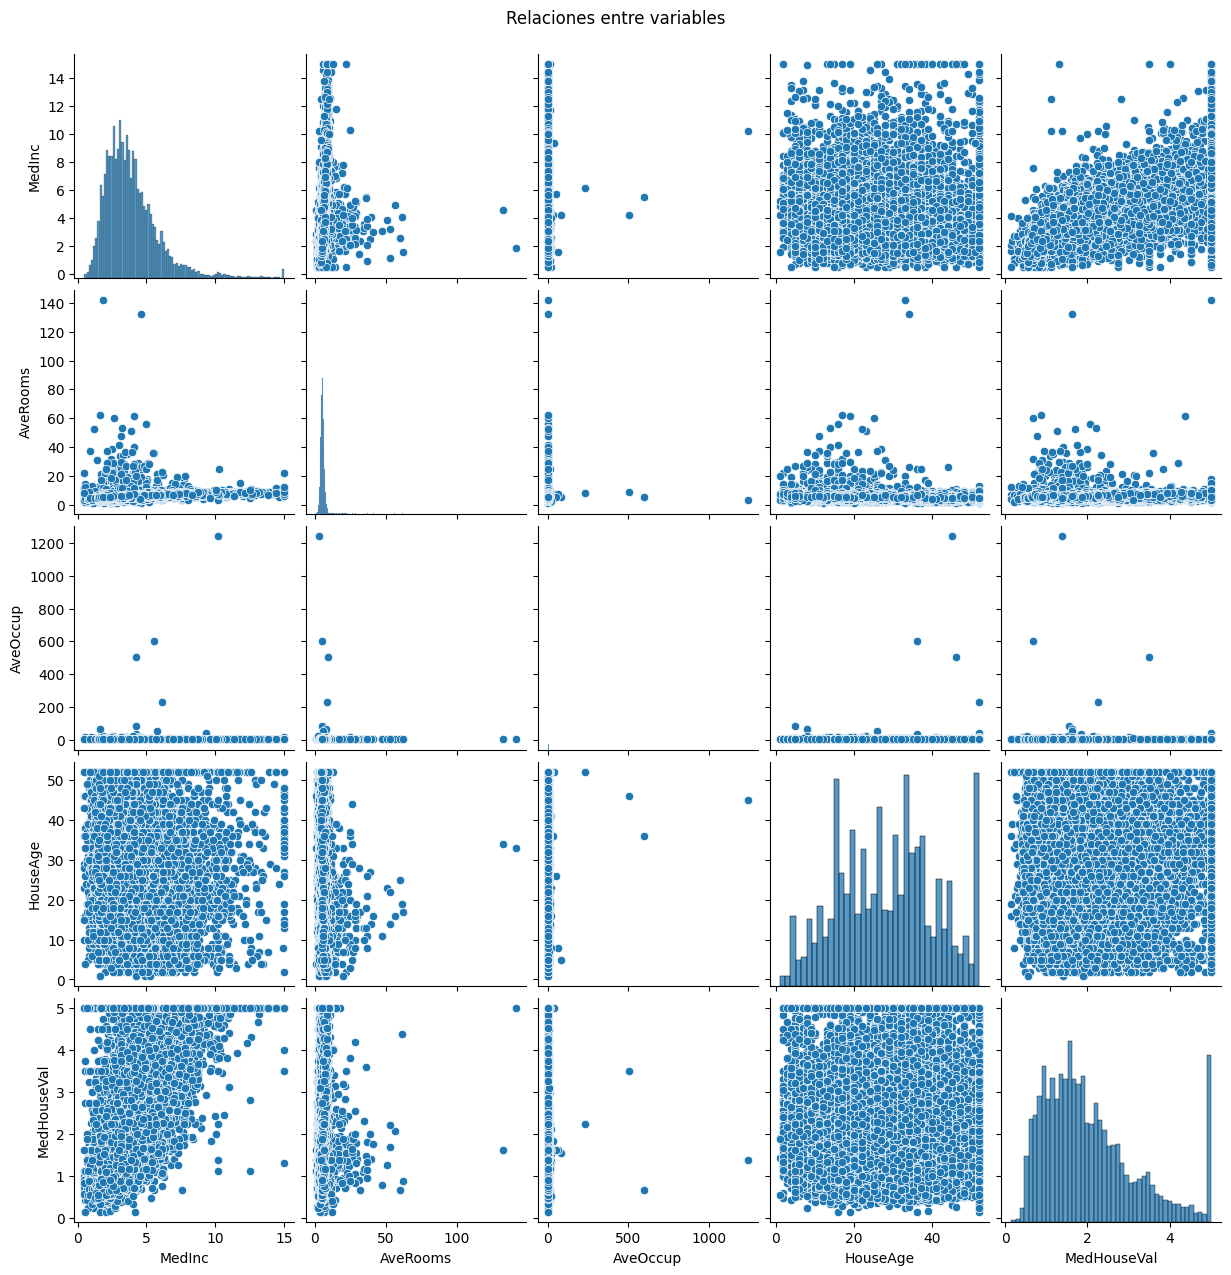

In [5]:
# 4. Visualizar la relación entre las variables
sns.pairplot(df[['MedInc', 'AveRooms', 'AveOccup', 'HouseAge', 'MedHouseVal']])
plt.suptitle("Relaciones entre variables", y=1.02)
plt.show()

In [6]:
# 5. Separar variables independientes y dependiente

X = df.drop(columns='MedHouseVal')  # variables independientes
y = df['MedHouseVal']  # variable dependiente


In [7]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [8]:
# 6. Separar datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80


In [10]:
y_train.head()

14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
Name: MedHouseVal, dtype: float64

In [ ]:
# 7. Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
# 8. Revisar coeficientes del modelo
coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': modelo.coef_
})
print(f"Intercepto: {modelo.intercept_:.4f}")
print(coeficientes)

Intercepto: -37.0233
     Variable  Coeficiente
0      MedInc     0.448675
1    HouseAge     0.009724
2    AveRooms    -0.123323
3   AveBedrms     0.783145
4  Population    -0.000002
5    AveOccup    -0.003526
6    Latitude    -0.419792
7   Longitude    -0.433708



### Ecuación del modelo de regresión lineal múltiple

El modelo entrenado tiene la siguiente forma:

MedHouseVal = intercepto + coef1 * MedInc + coef2 * HouseAge + coef3 * AveRooms + ...
Y = -37.02 +0.44*(1) +0.0097*(0.05).....

In [14]:
# 10. Realizar predicciones sobre el conjunto de prueba
y_pred1 = modelo.predict(X_test)
y_pred1

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251], shape=(4128,))

In [15]:
# 11. Evaluar el modelo
mse = mean_squared_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)
print(f"Error cuadrático medio (MSE): {mse:.4f}")
print(f"Coeficiente de determinación (R²): {r2:.4f}")

Error cuadrático medio (MSE): 0.5559
Coeficiente de determinación (R²): 0.5758


In [36]:

# MSE
mse = mean_squared_error(y_test, y_pred1)
print("Error cuadrático medio (MSE):", mse)

# RMSE
rmse = np.sqrt(mse)
print("Raíz del error cuadrático medio (RMSE):", rmse)

# MAE
mae = mean_absolute_error(y_test, y_pred1)
print("Error absoluto medio (MAE):", mae)

# R²
r2 = r2_score(y_test, y_pred1)
print("Coeficiente de determinación (R²):", r2)



Error cuadrático medio (MSE): 0.5558915986952437
Raíz del error cuadrático medio (RMSE): 0.745581383012776
Error absoluto medio (MAE): 0.5332001304956565
Coeficiente de determinación (R²): 0.5757877060324512


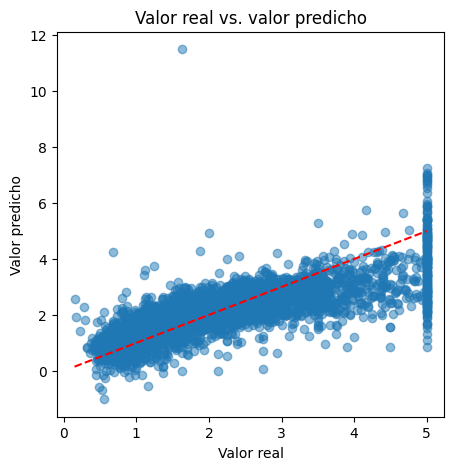

In [17]:
# 12. Visualizar predicciones frente a valores reales

plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred1, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('Valor real')
plt.ylabel('Valor predicho')
plt.title('Valor real vs. valor predicho')
plt.show()

In [63]:
# 13. Conclusión
# - Se ha entrenado un modelo de regresión lineal múltiple con datos reales.
# - Se evaluó usando el error cuadrático medio y el coeficiente de determinación.
# - La visualización permite comparar los valores predichos con los reales.
# - Este modelo puede mejorarse usando técnicas como regularización, selección de variables o modelos no lineales.

# Podrías probar con modelos como RandomForestRegressor o XGBoost u otros???

# Random Forest Regressor

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error


In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [29]:
rf = RandomForestRegressor(random_state=42)

# Definir el espacio de búsqueda
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Random Search con validación cruzada
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,              # número de combinaciones a probar
    cv=5,                   # validación cruzada
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", random_search.best_params_)
print("Mejor score:", -random_search.best_score_)

Mejores hiperparámetros: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Mejor score: 0.2440836807381233


In [30]:
rf = RandomForestRegressor(
    n_estimators=300, 
    max_depth=None, 
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='log2',
    random_state=42
)
rf.fit(X_train, y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
y_pred2 = rf.predict(X_test)


In [35]:

# MSE
mse = mean_squared_error(y_test, y_pred2)
print("Error cuadrático medio (MSE):", mse)

# RMSE
rmse = np.sqrt(mse)
print("Raíz del error cuadrático medio (RMSE):", rmse)

# MAE
mae = mean_absolute_error(y_test, y_pred2)
print("Error absoluto medio (MAE):", mae)

# R²
r2 = r2_score(y_test, y_pred2)
print("Coeficiente de determinación (R²):", r2)



Error cuadrático medio (MSE): 0.2406726910405948
Raíz del error cuadrático medio (RMSE): 0.4905840305601017
Error absoluto medio (MAE): 0.3201872234612497
Coeficiente de determinación (R²): 0.8163377273531236


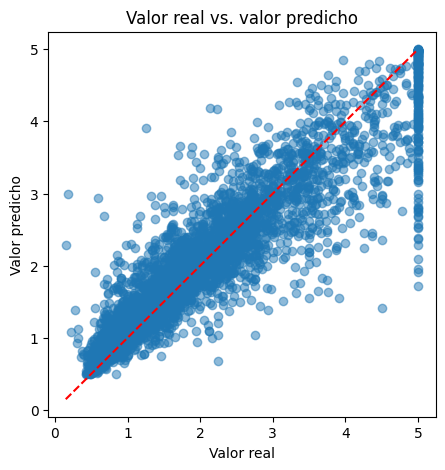

In [37]:
# 12. Visualizar predicciones frente a valores reales

plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred2, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('Valor real')
plt.ylabel('Valor predicho')
plt.title('Valor real vs. valor predicho')
plt.show()

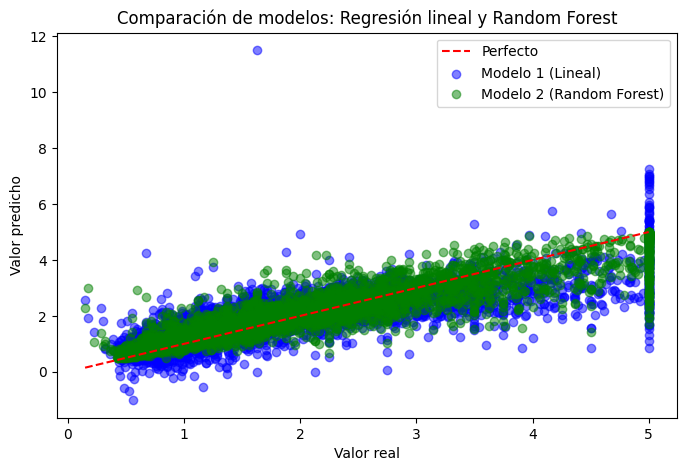

In [41]:
plt.figure(figsize=(8,5))

# Línea ideal (predicción perfecta)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label="Perfecto")

# Predicciones del modelo 1
plt.scatter(y_test, y_pred1, alpha=0.5, color="blue", label="Modelo 1 (Lineal)")

# Predicciones del modelo 2
plt.scatter(y_test, y_pred2, alpha=0.5, color="green", label="Modelo 2 (Random Forest)")

plt.xlabel("Valor real")
plt.ylabel("Valor predicho")
plt.title("Comparación de modelos: Regresión lineal y Random Forest")
plt.legend()
plt.show()
